In [1]:
%matplotlib widget

# DEFAULTS

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
from scipy.integrate import simpson
import sys
sys.path.append("..")
from truncation import get_truncation


FORCES = ["LO", "NLO", "N2LO", "N3LO", "N4LO", "N4LO+"]
CUTOFF = [400, 450, 500, 550]

# plt.style.use(['science', 'retro'])

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'DejaVu Sans'
mpl.rcParams['mathtext.it'] = 'DejaVu Sans:italic'
mpl.rcParams['mathtext.bf'] = 'DejaVu Sans:bold'

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"

# plt.rc('text', usetex=False)
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['lines.linewidth'] = 2

line_styles = {"LO": {"marker": "d", "markevery": 10, "markersize": 3, "color": "tab:cyan"},
               "NLO": {"marker": ".", "markevery": 10, "color": "orange"},
               "N2LO": {"ls":  (0, (5, 3)), "color": "green"},
               "N3LO": {"ls": "dotted", "color": "blue"},
               "N4LO": {"ls": (0, (5, 2, 0.8, 2, 0.8, 2)), "color": "red"},
               "N4LO+": {"color": "black"},
               "AV18": {"ls": (0, (5, 2, 1.3, 2,)), "color": "blueviolet"},
               "SIEGERT": {"color": "blue"},
               "1NC": {"color": "deeppink", "ls": "dashed"}
               }
ls_cutoff = {400: line_styles["N4LO"],
             450: line_styles["N4LO+"],
             500: line_styles["N2LO"],
             550: line_styles["N3LO"],
             }

exp_style = [
    {"fmt": "ok"},
    {"fmt": "ok", "markerfacecolor": "None", "markeredgecolor": "k"},
    {"fmt": "sk"},
    {"fmt": "^k"},
    {"fmt": "Xk"},
    {"fmt": "dk"},
]

trunc_colors = {
    "NLO": "bisque",
    "N2LO": "limegreen",
    "N3LO": "dodgerblue",
    "N4LO": "red",
    "N4LO+": "black",
}

marker_common = {"markersize": 6, "elinewidth": 0.9, "capsize": 2.5}


df_my = pd.read_csv("./deuteron_all_data.csv")
df_my.T21D2 *= 2
df_my.T22D2 *= 2
df_my.T21D *= 2
df_my.T22D *= 2
df_my.AX *= -1
df_my.AX2 *= -1

df_neuteron = pd.read_csv("./neuteron_Detected_data_2p75mev.csv")
df_neuteron100 = pd.read_csv("./neuteron_Detected_data_100mev.csv")
df_neuteron.T21D2 *= 2
df_neuteron.T22D2 *= 2
df_neuteron.T21D *= 2
df_neuteron.T22D *= 2
df_neuteron.AX *= -1
df_neuteron.AX2 *= -1
df_neuteron100.T21D2 *= 2
df_neuteron100.T22D2 *= 2
df_neuteron100.T21D *= 2
df_neuteron100.T22D *= 2
df_neuteron100.AX *= -1
df_neuteron100.AX2 *= -1

OBSERVABLES = [ob for ob in df_my.columns.values if ob not in [
    "THCM", "angle", "CUTOFF", "FORCE"]]

my_energies = df_my.Energy.unique()
my_energies.sort()

# Neuteron Polarization

In [2]:
df_jewell = pd.read_csv("./ExpData/PolarizationNeuteron/Jewell1965.dat")
df_cameron = pd.read_csv("./ExpData/PolarizationNeuteron/Cameron1986.dat")

/home/vitalii/anaconda3/envs/experimental/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_9692/2522405157.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(5, 8.4))


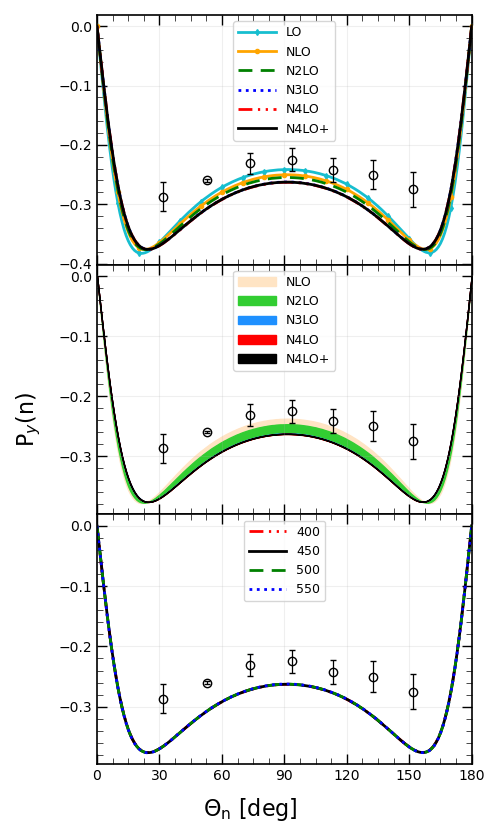

In [48]:
obs = "POLNOUT2(y)"
energy=2.75
cutoff=450
df=df_neuteron
wave="SIEGERT"
ylabel="P$_y$(n)"
df_tmp = df[(df.CUTOFF == cutoff) &
            (df.WAVE == wave)]
df_tmp.sort_values("angle", inplace=True)
df_piv = df_tmp.pivot(index="angle", columns="FORCE")[obs].reindex(FORCES, axis=1)
df_trunc = get_truncation(df_piv, energy)

fig = plt.figure(figsize=(5, 8.4))
gs = fig.add_gridspec(nrows=3, hspace=0)
axes = gs.subplots(sharex=True)
fig.supxlabel("$\Theta_\mathrm{n}$ [deg]", y=0.02, size=16)
if not ylabel:
    ylabel = obs
fig.supylabel(ylabel, x=0.03, size=16)
for force in FORCES:
    df_tmp = df[(df.FORCE == force) &
                (df.CUTOFF == cutoff) &
                # (df.Energy == energy) &
                (df.WAVE == "SIEGERT")]
    axes[0].plot(df_tmp.angle, df_tmp[obs],
                **line_styles[force], label=force)
    if force != "LO":
        axes[1].fill_between(df_tmp.angle, df_tmp[obs].values+df_trunc[force].values,
                            df_tmp[obs].values-df_trunc[force].values, label=force,
                            color=trunc_colors[force])
    # break
for cut in CUTOFF:
    df_tmp = df[(df.FORCE == "N4LO+") &
                (df.CUTOFF == cut) &
                # (df.Energy == energy) &
                (df.WAVE == "SIEGERT")]
    # print(df_tmp.head())
    axes[2].plot(df_tmp.angle, df_tmp[obs],
                **ls_cutoff[cut], label=cut)
# df_av18 = df[(df.FORCE == "AV18") & (df.Energy == energy)]
for j, ax in enumerate(axes):
    ax.errorbar(df_jewell.Theta, df_jewell["P(n)"],
                yerr=df_jewell.Error, zorder=3, **exp_style[1], **marker_common)
                    # , label=df_tmp.fname[0])
    # if j != 1:
    #     ax.plot(df_av18.angle, df_av18[obs],
    #             **line_styles["AV18"], label="AV18")

    ax.legend(fontsize=9, handlelength=3, loc="upper center")
    
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.tick_params(which='minor', direction='in', length=4,
                width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in',
                length=7, width=1, top=True, right=True, zorder=1)
    ax.set_xticks(np.arange(0, 180+j-1, 30))
    ax.set_xlim([0, 180])
    ax.grid(alpha=0.2)
    ax.set_zorder(-1)
fig.tight_layout()
plt.savefig(f"../Figures_De/{obs}_{energy}mev_neuteron.pdf",
            dpi=600, facecolor="white")

In [5]:
df_neuteron100.FORCE.unique()

array(['N4LO+', 'NLO', 'N3LO', 'N2LO', 'N4LO', 'LO'], dtype=object)

/home/vitalii/anaconda3/envs/experimental/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


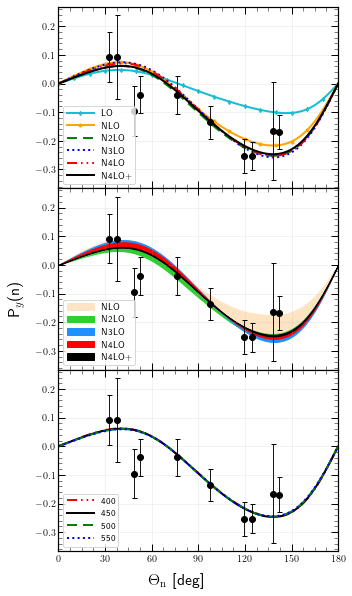

In [7]:
obs = "POLNOUT2(y)"
energy=100
cutoff=450
df=df_neuteron100
wave="SIEGERT"
ylabel="P$_y$(n)"
df_tmp = df[(df.CUTOFF == cutoff) &
            (df.WAVE == wave)]
df_tmp.sort_values("angle", inplace=True)
df_piv = df_tmp.pivot(index="angle", columns="FORCE")[obs].reindex(FORCES, axis=1)
df_trunc = get_truncation(df_piv, energy)

fig = plt.figure(figsize=(5, 8.4))
gs = fig.add_gridspec(nrows=3, hspace=0)
axes = gs.subplots(sharex=True)
fig.supxlabel("$\Theta_\mathrm{n}$ [deg]", y=0.02, size=16)
if not ylabel:
    ylabel = obs
fig.supylabel(ylabel, x=0.03, size=16)
for force in FORCES:
    df_tmp = df[(df.FORCE == force) &
                (df.CUTOFF == cutoff) &
                # (df.Energy == energy) &
                (df.WAVE == "SIEGERT")]
    axes[0].plot(df_tmp.angle, df_tmp[obs],
                **line_styles[force], label=force)
    if force != "LO":
        axes[1].fill_between(df_tmp.angle, df_tmp[obs].values+df_trunc[force].values,
                            df_tmp[obs].values-df_trunc[force].values, label=force,
                            color=trunc_colors[force])
    # break
for cut in CUTOFF:
    df_tmp = df[(df.FORCE == "N4LO+") &
                (df.CUTOFF == cut) &
                # (df.Energy == energy) &
                (df.WAVE == "SIEGERT")]
    # print(df_tmp.head())
    axes[2].plot(df_tmp.angle, df_tmp[obs],
                **ls_cutoff[cut], label=cut)
# df_av18 = df[(df.FORCE == "AV18") & (df.Energy == energy)]
for j, ax in enumerate(axes):
    ax.errorbar(df_cameron.Theta, df_cameron["P(n)"],
                yerr=df_cameron.Error, zorder=3, **exp_style[0], **marker_common)
                    # , label=df_tmp.fname[0])
    # if j != 1:
    #     ax.plot(df_av18.angle, df_av18[obs],
    #             **line_styles["AV18"], label="AV18")

    ax.legend(fontsize=9, handlelength=3, loc="lower left")
    
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.tick_params(which='minor', direction='in', length=4,
                width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in',
                length=7, width=1, top=True, right=True, zorder=1)
    ax.set_xticks(np.arange(0, 180+j-1, 30))
    ax.set_xlim([0, 180])
    ax.grid(alpha=0.2)
    ax.set_zorder(-1)
fig.tight_layout()
plt.savefig(f"../Figures_De/{obs}_{energy}mev_neuteron.pdf",
            dpi=600, facecolor="white")

# Proton polarization

In [24]:
def make_fig(obs, energy, cutoff, df, exp=None, wave="SIEGERT", ylabel=None, save=True):
    df_tmp = df[(df.CUTOFF == cutoff) &
                (df.Energy == energy) &
                (df.WAVE == wave)]
    df_tmp.sort_values("angle", inplace=True)
    df_piv = df_tmp.pivot(index="angle", columns="FORCE")[
        obs].reindex(FORCES, axis=1)
    df_trunc = get_truncation(df_piv, energy)

    fig = plt.figure(figsize=(5, 8.4))
    gs = fig.add_gridspec(nrows=3, hspace=0)
    axes = gs.subplots(sharex=True)
    fig.supxlabel("$\Theta_\mathrm{p}$ [deg]", y=0.02, size=16)
    if not ylabel:
        ylabel = obs
    fig.supylabel(ylabel, x=0.03, size=16)
    for force in FORCES:
        df_tmp = df[(df.FORCE == force) &
                    (df.CUTOFF == cutoff) &
                    (df.Energy == energy) &
                    (df.WAVE == "SIEGERT")]
        axes[0].plot(df_tmp.angle, df_tmp[obs],
                     **line_styles[force], label=force)
        if force != "LO":
            axes[1].fill_between(df_tmp.angle, df_tmp[obs].values+df_trunc[force].values,
                                 df_tmp[obs].values-df_trunc[force].values, label=force,
                                 color=trunc_colors[force])
        # break
    for cut in CUTOFF:
        df_tmp = df[(df.FORCE == "N4LO+") &
                    (df.CUTOFF == cut) &
                    (df.Energy == energy) &
                    (df.WAVE == "SIEGERT")]
        axes[2].plot(df_tmp.angle, df_tmp[obs],
                     **ls_cutoff[cut], label=cut)
    df_av18 = df[(df.FORCE == "AV18") & (df.Energy == energy)]
    for j, ax in enumerate(axes):
        if j != 1:
            ax.plot(df_av18.angle, df_av18[obs],
                    **line_styles["AV18"], label="AV18")
        # style
        # tmp
        # if j == 1:
        #     ax.legend(fontsize=9, handlelength=3, loc="upper center")
        # else:
        #     ax.legend(fontsize=9, handlelength=3, loc="best")
        ax.legend(fontsize=9, handlelength=3, loc="best")

        ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.tick_params(which='minor', direction='in', length=4,
                       width=0.5, top=True, right=True)
        ax.tick_params(which='major', direction='in',
                       length=7, width=1, top=True, right=True, zorder=1)
        ax.set_xticks(np.arange(0, 180+j-1, 30))
        ax.set_xlim([0, 180])
        ax.grid(alpha=0.2)
        ax.set_zorder(-1)
    fig.tight_layout()
    if save:
        plt.savefig(f"../Figures_De/{obs}_{energy}mev.pdf",
                    dpi=600, facecolor="white")
    return ax, fig


/home/vitalii/anaconda3/envs/experimental/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


(<AxesSubplot:>, <Figure size 360x604.8 with 3 Axes>)

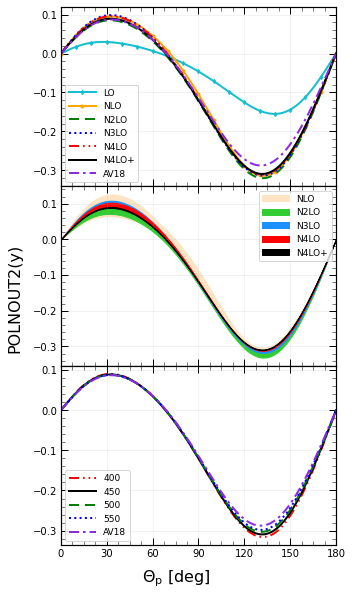

In [25]:
make_fig("POLNOUT2(y)", 100, 450, df_my, save=False)

In [79]:
df_tmp = df_my[(df_my.FORCE == "N4LO+") &
                    (df_my.Energy == 100) &
                    (df_my.WAVE == "SIEGERT")]

In [80]:
AMNMEV, s = df_tmp.groupby("angle")["POLNOUT2(y)"].agg(
    ["mean", "std"]).sort_values("std", ascending=False).iloc[0]
print(df_tmp.groupby("angle")["POLNOUT2(y)"].agg(
    ["mean", "std"]).sort_values("std", ascending=False).head())


          mean       std
angle                   
146.0 -0.27330  0.008735
145.0 -0.27770  0.008735
142.0 -0.28915  0.008730
143.0 -0.28565  0.008730
144.0 -0.28185  0.008730


In [81]:
s/np.abs(AMNMEV)*100

3.196116765740568

# Test

In [3]:
MN = 939.5653
MP = 938.2720
AMNMEV = 2.0*MP*MN/(MP+MN)
absb2 = 2.225
md = 2*AMNMEV-absb2


In [11]:
omegalab = np.arange(0,200,0.1)

In [12]:
OMEGACM = (-2*AMNMEV*md + np.sqrt(2.)*np.sqrt(-4*absb2*AMNMEV**2*md + 8*AMNMEV**3*md - 
            2*AMNMEV**2*md**2 + 4*AMNMEV**2*md*omegalab - AMNMEV*md*omegalab**2))/ (2.*AMNMEV)


In [19]:
Tlab = 2*(md - 2*AMNMEV + OMEGACM + OMEGACM**2/2/md)

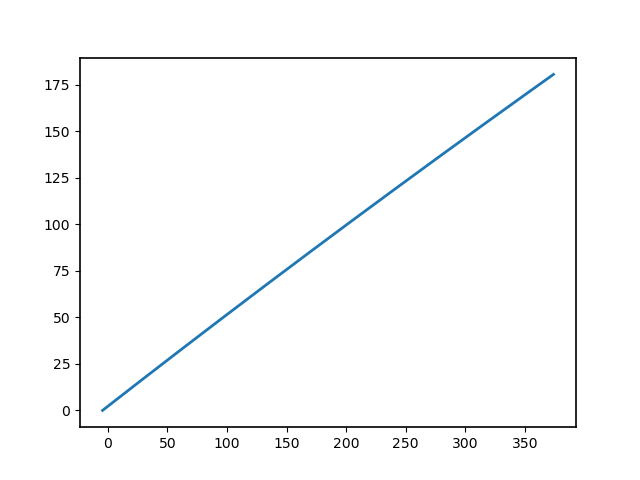

In [20]:
plt.figure()
plt.plot(Tlab, OMEGACM)
plt.show()

In [28]:
Tlab[950]

180.74393704617034

In [29]:
OMEGACM[950]

90.41758843966537